###Problem Statement
#[insert]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv')
data.shape

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9492670, 11)

In [3]:
df = pd.DataFrame(data)
df.shape

(9492670, 11)

In [4]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [5]:
df=df.rename(columns = {'Exits                                                     ':'Exits'})

In [6]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits'],
      dtype='object')

In [7]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,23:00:00,REGULAR,5572864,1881239
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,19:00:00,REGULAR,5572521,1881206
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,15:00:00,REGULAR,5571587,1881113
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,11:00:00,REGULAR,5571313,1881031
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/04/2016,08:10:05,REGULAR,5571173,1880736


In [8]:
df.describe()

,Entries,Exits
count,9.492670e+06,9.492670e+06
mean,3.542553e+07,2.850508e+07
std,1.953005e+08,1.754109e+08
min,0.000000e+00,0.000000e+00
25%,5.723050e+05,2.936032e+05
50%,2.595306e+06,1.507240e+06
75%,6.546587e+06,4.656424e+06
max,2.147480e+09,2.097170e+09


In [9]:
data = df.iloc[9000000:,3:]
print(data.shape)
print(type(data))

(492670, 8)
<class 'pandas.core.frame.DataFrame'>


In [10]:
data['Entry_Inc'] = abs(data.Entries.diff())
data['Exits_Inc'] = abs(data.Exits.diff())
data['Traffic_Tot'] = np.add(data.Entry_Inc, data.Exits_Inc)
data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9000000,75 AV,EF,IND,12/03/2016,03:00:00,REGULAR,714833,200563,NaN,NaN,NaN
9000001,75 AV,EF,IND,12/03/2016,07:00:00,REGULAR,714833,200565,0.0,2.0,2.0
9000002,75 AV,EF,IND,12/03/2016,11:00:00,REGULAR,714845,200566,12.0,1.0,13.0
9000003,75 AV,EF,IND,12/03/2016,15:00:00,REGULAR,714858,200570,13.0,4.0,17.0
9000004,75 AV,EF,IND,12/03/2016,19:00:00,REGULAR,714879,200579,21.0,9.0,30.0


In [11]:
data_23ST = data[data['Station'] == '23 ST']
data_23ST = data_23ST.dropna()
data_23ST.head()


,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9011579,23 ST,FM,IND,12/03/2016,03:00:00,REGULAR,236787155,455911437,235879734.0,455881110.0,691760844.0
9011580,23 ST,FM,IND,12/03/2016,07:00:00,REGULAR,236787169,455911474,14.0,37.0,51.0
9011581,23 ST,FM,IND,12/03/2016,11:00:00,REGULAR,236787224,455911787,55.0,313.0,368.0
9011582,23 ST,FM,IND,12/03/2016,15:00:00,REGULAR,236787488,455912182,264.0,395.0,659.0
9011583,23 ST,FM,IND,12/03/2016,19:00:00,REGULAR,236787614,455912398,126.0,216.0,342.0


/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


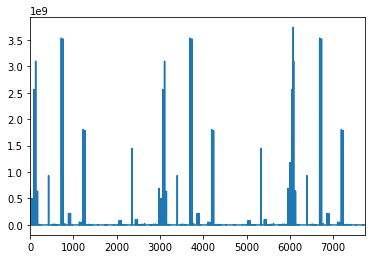

In [12]:
ax = sns.tsplot(data_23ST['Traffic_Tot'])

In [13]:
outlier = 10000 # rough estimate of outlier cutoff (ie no station can handle more than this amount in a 4 hour period)
data_23ST['Entry_Inc'] = data_23ST['Entry_Inc'][data_23ST['Entry_Inc']<outlier]
data_23ST['Exits_Inc'] = data_23ST['Exits_Inc'][data_23ST['Exits_Inc']<outlier]

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


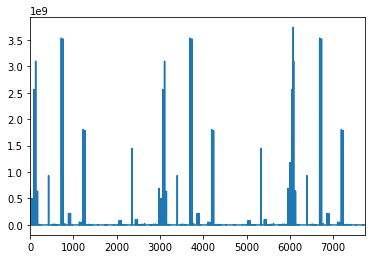

In [14]:
ax = sns.tsplot(data_23ST['Traffic_Tot'])

In [15]:
# sns.distplot(q4b['Traffic_Tot'],bins=50)
# sns.plt.xlim(0, 100000)

In [16]:
data.describe()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
count,7.735000e+03,7.735000e+03,7555.000000,7553.000000,7.735000e+03
mean,1.049546e+08,9.859223e+07,217.818795,165.267576,9.368778e+06
std,3.648428e+08,3.365641e+08,313.961773,218.829715,1.515574e+08
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.384358e+06,1.021896e+06,17.000000,16.000000,4.900000e+01
50%,4.465675e+06,2.587617e+06,95.000000,84.000000,2.210000e+02
75%,8.124084e+06,9.359794e+06,306.000000,236.000000,6.220000e+02
max,1.997295e+09,1.930733e+09,8454.000000,1801.000000,3.740889e+09


In [17]:
# aggregate by station then by day
# add columns for incremental change by day
# remove outliers
# per station, two sep analyses: group by time, and group by date, weekday/weekend


data.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
9011579,23 ST,FM,IND,12/03/2016,03:00:00,REGULAR,236787155,455911437,NaN,NaN,691760844.0
9011580,23 ST,FM,IND,12/03/2016,07:00:00,REGULAR,236787169,455911474,14.0,37.0,51.0
9011581,23 ST,FM,IND,12/03/2016,11:00:00,REGULAR,236787224,455911787,55.0,313.0,368.0
9011582,23 ST,FM,IND,12/03/2016,15:00:00,REGULAR,236787488,455912182,264.0,395.0,659.0
9011583,23 ST,FM,IND,12/03/2016,19:00:00,REGULAR,236787614,455912398,126.0,216.0,342.0


In [18]:
# outlier = 10000 # rough estimate of outlier cutoff (ie no station can handle more than this amount in a 4 hour period)
# q4['Entry_Inc'] = q4['Entry_Inc'][q4['Entry_Inc']<outlier]
# q4['Exits_Inc'] = q4['Exits_Inc'][q4['Exits_Inc']<outlier]

In [19]:
print(data['Entry_Inc'].describe())
print(data['Exits_Inc'].describe())

count    7555.000000
mean      217.818795
std       313.961773
min         0.000000
25%        17.000000
50%        95.000000
75%       306.000000
max      8454.000000
Name: Entry_Inc, dtype: float64
count    7553.000000
mean      165.267576
std       218.829715
min         0.000000
25%        16.000000
50%        84.000000
75%       236.000000
max      1801.000000
Name: Exits_Inc, dtype: float64


In [20]:
data_stndatetime = data.groupby([ "Station", "Date",'Time']).sum()
data_stndatetime.head()

Entries       Exits  Entry_Inc  Exits_Inc  \
Station Date       Time                                                     
23 ST   12/03/2016 00:00:00  3112889135  2715656450     1276.0     1448.0   
                   03:00:00  3106627484  3258143258     8454.0        0.0   
                   04:00:00  3112890256  2715656887     1251.0      527.0   
                   07:00:00  3106627638  3258143487      202.0      229.0   
                   08:00:00  3112890717  2715658018      503.0     1297.0   

                              Traffic_Tot  
Station Date       Time                    
23 ST   12/03/2016 00:00:00  1.223380e+10  
                   03:00:00  7.510839e+09  
                   04:00:00  1.778000e+03  
                   07:00:00  4.310000e+02  
                   08:00:00  1.800000e+03

In [21]:
data_stn = data.groupby([ "Station"]).sum()
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
23 ST,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10


In [22]:
data_stn = pd.DataFrame(data_stn)
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot
Station,,,,,
23 ST,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10


In [23]:
data_stn['Station_ID'] = data_stn.index
data_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
23 ST,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10,23 ST


In [24]:
q4_stn = q4_stn.sort_values(['Traffic_Tot'], ascending=[False])
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Station,,,,,,
23 ST,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10,23 ST


In [25]:
q4_stn['Idx'] = np.arange(q4_stn.shape[0])
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID,Idx
Station,,,,,,,
23 ST,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10,23 ST,0


In [26]:
q4_stn = q4_stn.set_index('Idx')
q4_stn.head()

,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10,23 ST


In [27]:
# demographic data: NYC census
# map of startups in NYC
# calendar of tech events
# unicorn 

import seaborn as sns
sns.set_style("whitegrid")


In [28]:
q4_stn = q4_stn.iloc[:20,:] # limit to 10 most active stations
q4_stn


,Entries,Exits,Entry_Inc,Exits_Inc,Traffic_Tot,Station_ID
Idx,,,,,,
0,811823469426,762610906220,1645621.0,1248266.0,7.246750e+10,23 ST


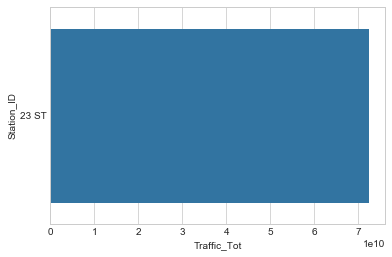

In [29]:
ax = sns.barplot(x="Traffic_Tot", y='Station_ID', data=q4_stn)


In [30]:
# PROBLEM STATEMENT
# Optimize utilization of street teams by using data science by utilizing MTA 
# and [Demographic] data

# PRESENTATION
# Executive Summary / Scenario
# MTA findings
# Demographic findings
# Combined MTA/Demo Analysis
# Conclusion
# Q&A

# TODO:
# Map which includes demographic data (ie income) and station activity (by size of dot)
# Analyze top stations by time period (season, month, week, day, hour)
# add lat/long
# vet data better / graph 